# K Nearest Neighbors Model

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/michellehandipranata/opt/anaconda3/lib/python3.7/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
len(df)

6991

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [9]:
len(df)

6991

In [11]:
list(df.columns)

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[[
    'koi_disposition', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
    'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 
    'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
    'koi_kepmag'
]]
selected_features

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929,176.40,8.4,1,5638,4.296,1.088,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088,4500.53,453.3,1,5638,4.529,0.903,297.18875,47.093819,14.082
6988,CANDIDATE,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608,1585.81,10.6,1,6119,4.444,1.031,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218,5713.41,12.3,1,6173,4.447,1.041,294.16489,47.176281,15.385


In [5]:
selected_features["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
# Assign X (data) and y (target)
X = selected_features.drop("koi_disposition", axis=1)
y = selected_features["koi_disposition"]
print(X.shape, y.shape)

(6991, 16) (6991,)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Label-encode y data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(y)


0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object


In [7]:
print(encoded_y)


[1 2 2 ... 0 2 2]


In [8]:
# Split the date between train and test values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=1)

In [9]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
3563,10.548413,139.064020,1.0170,1.8720,102.9,3.89,899,154.84,11.7,2,6047,4.387,1.092,298.09543,44.737061,13.204
4099,24.754385,140.207320,0.7090,3.3900,593.3,2.10,491,13.70,18.0,1,4852,4.519,0.804,295.73535,42.576248,15.514
5460,1.057336,131.792007,0.2620,1.5795,47337.0,14.59,1276,623.51,476.0,1,4664,4.594,0.683,292.18417,49.310040,15.414
1091,201.118319,187.569860,0.0010,10.3280,584.8,2.28,300,1.92,34.7,1,5646,4.447,0.954,283.11377,48.131390,13.328
5999,91.649983,175.715600,0.2136,10.2940,193.6,2.27,568,24.57,8.7,2,6705,4.145,1.608,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale our data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

In [11]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
X_train_scaled

array([[9.56989489e-03, 1.36824641e-02, 1.00886852e-02, ...,
        8.34972972e-01, 5.17791237e-01, 5.15579800e-01],
       [2.28349382e-02, 1.45281274e-02, 7.03331151e-03, ...,
        7.26931676e-01, 3.80671885e-01, 7.06504670e-01],
       [7.07456000e-04, 8.30358269e-03, 2.59905164e-03, ...,
        5.64363420e-01, 8.07980123e-01, 6.98239524e-01],
       ...,
       [7.19536260e-04, 8.33604232e-03, 1.25885364e-02, ...,
        8.84193728e-01, 2.72465200e-01, 7.40557071e-01],
       [1.72249745e-02, 1.96491654e-02, 5.03938258e-03, ...,
        3.80357476e-01, 5.86290089e-01, 7.33697000e-01],
       [1.94140012e-02, 9.90951690e-03, 8.25347698e-03, ...,
        2.57228450e-01, 7.27065153e-01, 5.99801636e-01]])

# Train the Model



k: 1, Train/Test Score: 1.000/0.542
k: 3, Train/Test Score: 0.761/0.555
k: 5, Train/Test Score: 0.706/0.558
k: 7, Train/Test Score: 0.681/0.574
k: 9, Train/Test Score: 0.673/0.579
k: 11, Train/Test Score: 0.660/0.576
k: 13, Train/Test Score: 0.657/0.583
k: 15, Train/Test Score: 0.651/0.581
k: 17, Train/Test Score: 0.650/0.590
k: 19, Train/Test Score: 0.646/0.587
k: 21, Train/Test Score: 0.640/0.582
k: 23, Train/Test Score: 0.635/0.588
k: 25, Train/Test Score: 0.635/0.591
k: 27, Train/Test Score: 0.634/0.586
k: 29, Train/Test Score: 0.627/0.585
k: 31, Train/Test Score: 0.627/0.585
k: 33, Train/Test Score: 0.624/0.593
k: 35, Train/Test Score: 0.621/0.588
k: 37, Train/Test Score: 0.620/0.589
k: 39, Train/Test Score: 0.617/0.585


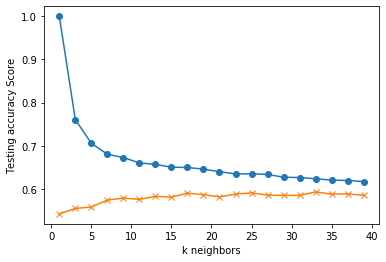

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_scaled, y_train)
    train_score = model_knn.score(X_train_scaled, y_train)
    test_score = model_knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
print(f"Training Data Score: {model_knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.6172038909021552
Testing Data Score: 0.5852402745995423


# Save the Model

In [18]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn.sav'
joblib.dump(model_knn, filename)

['knn.sav']